In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from gammapy.data import DataStore
from astropy.coordinates import SkyCoord
from astropy.time import Time
from agn_pipe.query import  get_exclusion_regions, query_datastore
from agn_pipe.analysis.spectral_analysis import SpectralAnalysis
import matplotlib.pyplot as plt


In [33]:
c = SkyCoord.from_name("1ES1011+496")
fname = "/raid/RAID1/VERITAS_Data/gammapy/dl3_fullenclosure_moderate2tel_runwise/"
ra = c.ra.deg
dec = c.dec.deg
search_cone = 2.0
tstart = Time("2007-01-01T00:00:00")
tstop = Time("2024-03-01T00:00:00")

# tstart = Time("2021-08-23T00:00:00") # 59449
# tstop = Time("2022-01-10T00:00:00") # 59589

obs = query_datastore(fname, ra, dec, tstart= tstart, tstop = tstop)
print (len(obs))

238


In [34]:
myspec = SpectralAnalysis(fname,ra, dec, tstart = tstart, tstop= tstop, source_name="1ES1011+496")

In [35]:
myspec.scratch_path

PosixPath('analysis/7cdfc647-1bf6-4c0f-982b-32447bf08dc5')

In [36]:
myspec.initialize_analysis()

In [37]:
myspec.setup_model("pwl")

In [38]:
myspec.dataset_stacked.models

In [39]:
myspec.fit_spectrum()

In [40]:
points = myspec.get_spectral_points(e_min = 0.1, e_max = 100)

No dataset contribute in range 46.41588833612777 TeV-100.0 TeV


In [41]:
tab = points.to_table()
tab

e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float64[1],float64,float64,bool,float64[1],bool,float64[11],float64[11]
0.13949507939624212,0.10000000000000002,0.19458877175763883,1.1601408124127177e-09,1.2115962021087242e-10,1.5705368407786518e-11,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,False,0.0,False,nan .. nan,0.2 .. 4.999999999999999
0.30329340116768616,0.19458877175763883,0.4727245378085489,7.356399949301948e-11,2.431549476816824e-11,6.492342666493786e-12,0.9999469682970634,0.033368434706879474,0.03309874395050123,0.03363953405617988,1.0677710636115538,1801.6334447988875,42.44565283746838,1545.6243867993398,1196.3192138671875,13.411406589499165,1815.0448513883866,False,1551.0,True,974.2560268196967 .. 5195.557462746366,0.2 .. 4.999999999999999
0.6594274693415538,0.4727245378085489,0.9198688719186306,4.664659637440435e-12,2.3029011920668105e-12,1.4111516096002637e-12,1.051497380073638,0.05543087937049105,0.05474868074262129,0.05612346565529225,1.1651974615243634,695.0752914744426,26.364280598462052,655.4186619156565,493.13897705078125,1.5717870686862625,696.6470785431288,False,656.0,True,389.6416315610709 .. 1935.5022558091773,0.2 .. 4.999999999999999
1.433742328873773,0.9198688719186306,2.234684886463062,2.9578393892559725e-13,4.621686811979947e-13,5.833470165116863e-13,0.868412239630951,0.09610827130566672,0.09394230884399751,0.0983105519992483,1.0695084982814989,140.13239387641715,11.837752906545107,187.98240246793284,126.75148010253906,3.6864988534141503,143.8188927298313,False,189.0,True,75.01301032464221 .. 663.8606799274796,0.2 .. 4.999999999999999
3.117275456627471,2.234684886463062,4.34844587322206,1.8755524588359346e-14,4.377162862670336e-14,1.267941517557861e-13,0.845634612385397,0.2899013252349267,0.2720662338747988,0.30863021705219645,1.5019125648334524,13.533448275896738,3.678783532079149,24.01392134118426,14.622698783874512,0.06379913197172016,13.597247407868458,False,24.0,True,6.994488167487816 .. 76.68078206335541,0.2 .. 4.999999999999999
6.777651797534069,4.34844587322206,10.563903801010005,1.1892792551966037e-15,8.784517523366237e-15,5.241463045832464e-14,-0.22479961866252496,0.4773231740701134,nan,0.5532818265438554,1.074210884817044,0.19435724973427915,-0.44085967124957026,1.408711807508389,-0.7836728692054749,1.9618446629394692,2.1562019126737484,True,2.0,True,2.5883873292342847 .. 28.59362383965661,0.2 .. 4.999999999999999
14.736125994561542,10.563903801010005,20.556170656043893,7.541165485282298e-17,8.319746757847237e-16,1.1392650378667234e-14,nan,nan,nan,1.6723128812278685,nan,-0.5979742255323451,-0.0,0.42398711765561625,0.29898712038993835,0.8650370219572615,0.26706279642491637,True,0.0,False,0.38665764153138504 .. 3.2569339240866437,0.2 .. 4.999999999999999
30.889042098927565,20.556170656043893,46.415888336127765,5.444991246548037e-18,1.6299806195092978e-16,4.518539894838267e-15,-8.060691058206835,5.699749382553192,nan,11.21342377733303,nan,0.6958930008711963,-0.8342020144252807,0.10506695892682619,-0.3846763074398041,0.24411426904449796,0.9400072699156943,True,0.0,True,0.9590962696920333 .. 1.4172322643241793,0.2 .. 4.999999999999999


<Axes: xlabel='Energy [$\\mathrm{TeV}$]', ylabel='dnde [$\\mathrm{TeV^{-1}\\,s^{-1}\\,cm^{-2}}$]'>

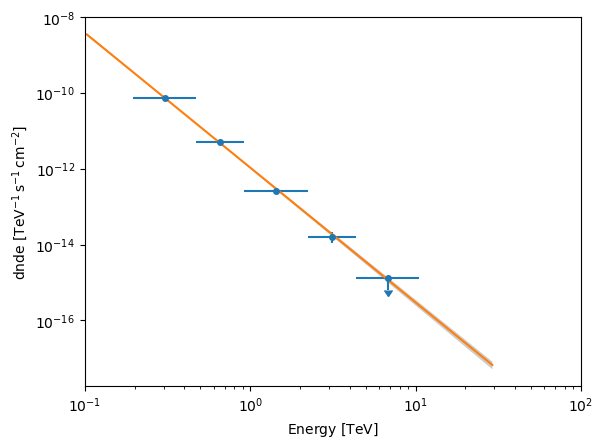

In [42]:
from astropy import units as u
fig, ax = plt.subplots()
points.plot(sed_type="dnde")
myspec.model.spectral_model.plot([0.1 * u.TeV, 30 * u.TeV])
myspec.model.spectral_model.plot_error([0.1 * u.TeV, 30 * u.TeV])


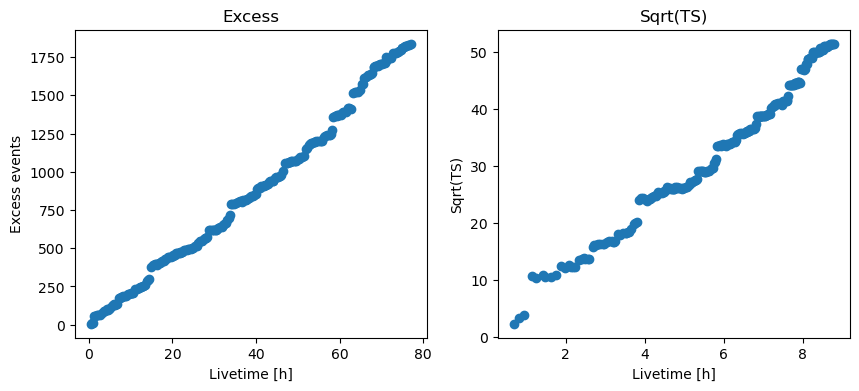

In [43]:
import numpy as np

fig, (ax_excess, ax_sqrt_ts) = plt.subplots(figsize=(10, 4), ncols=2, nrows=1)
ax_excess.plot(
    myspec.info_table["livetime"].to("h"),
    myspec.info_table["excess"],
    marker="o",
    ls="none",
)

ax_excess.set_title("Excess")
ax_excess.set_xlabel("Livetime [h]")
ax_excess.set_ylabel("Excess events")

ax_sqrt_ts.plot(
    np.sqrt(myspec.info_table["livetime"].to("h")),
    myspec.info_table["sqrt_ts"],
    marker="o",
    ls="none",
)

ax_sqrt_ts.set_title("Sqrt(TS)")
ax_sqrt_ts.set_xlabel("Livetime [h]")
ax_sqrt_ts.set_ylabel("Sqrt(TS)")
plt.show()

In [44]:
print (f"Total significance: {myspec.info_table['sqrt_ts'][-1]:0.2f}")

Total significance: 51.32


In [45]:
my_lc_daily = myspec.run_lightcurve(1)
my_lc_weekly = myspec.run_lightcurve(7)
my_lc_monthly = myspec.run_lightcurve(28)
my_lc_yearly = myspec.run_lightcurve(365)


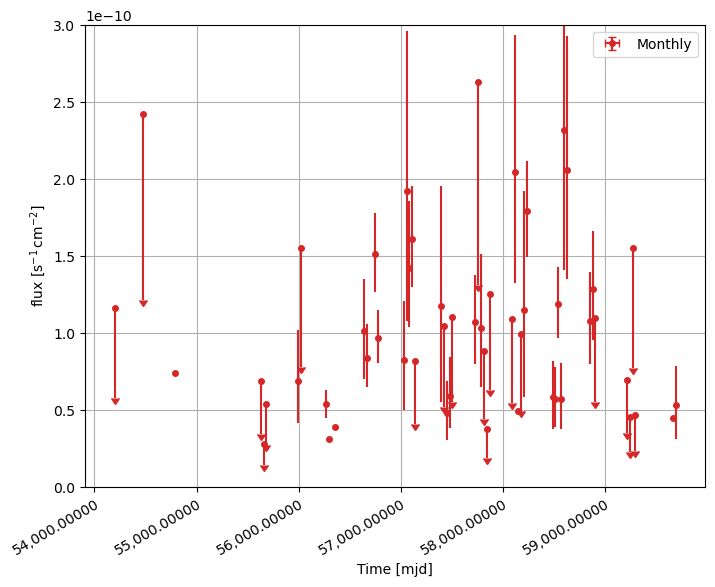

In [46]:
plt.figure(figsize=(8, 6))
# my_lc_daily.plot(marker="o", sed_type="flux",time_format="mjd", label = "Daily")
# my_lc_weekly.plot(marker="o", color = "C2", sed_type="flux",time_format="mjd", label = "Weekly")
my_lc_monthly.plot(marker="o", color = "C3",  sed_type="flux",time_format="mjd", label = "Monthly")
plt.yscale('linear')
# plt.ylim(-0.1e-10, 1e-10)
plt.ylim(0, 0.3e-9)

plt.grid()

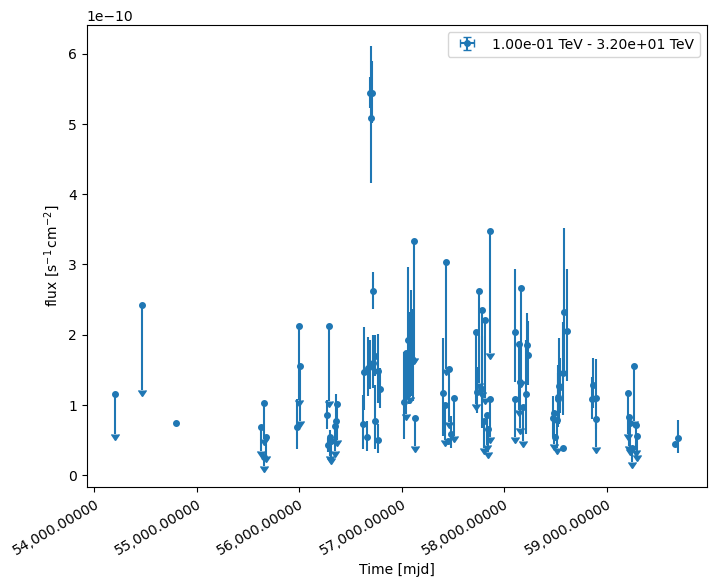

In [47]:
plt.figure(figsize=(8, 6))
my_lc_weekly.plot(marker="o", sed_type="flux",time_format="mjd")
plt.yscale('linear')

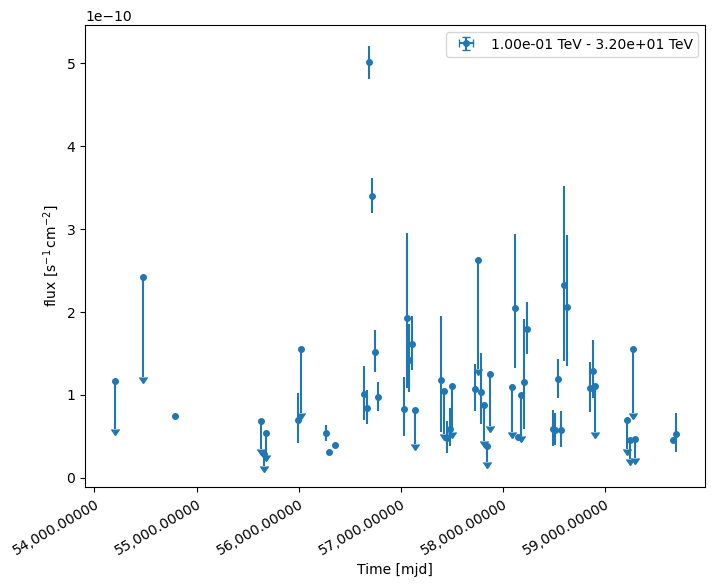

In [48]:
plt.figure(figsize=(8, 6))
my_lc_monthly.plot(marker="o", sed_type="flux",time_format="mjd")
plt.yscale('linear')

In [49]:
my_lc_daily.to_table(format="lightcurve")

time_min,time_max,e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,238]","float64[1,238]",float64[1],float64[1],bool[1],"float64[1,238]",bool[1],"float64[1,11]","float64[1,11]"
54199.000754444445,54200.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.0006095341775339365,0.01937823570945832,nan,0.37841993377151567,0.7821426529616142,-0.0003057047355916609,0.0,nan .. nan,nan .. nan,12.518422441424143,12.518116736688551,True,nan .. nan,True,12.862184234093291 .. 73.07917463082359,0.2 .. 4.999999999999999
54466.000754444445,54467.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.17401910816755908,0.5948973857845596,nan,0.6550496563575338,1.634245373495002,0.09120842822379238,0.3020073314073557,nan .. nan,nan .. nan,6.748205590197649,6.839414018421442,True,nan .. nan,True,6.749858041167404 .. 30.808558769361124,0.2 .. 4.999999999999999
54794.000754444445,54795.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.499934760443979,0.37380212985688976,nan,0.3932699407845866,1.3708254576544838,4.018031314473761,2.004502759906746,nan .. nan,nan .. nan,11.888362473543598,15.90639378801736,False,nan .. nan,True,12.860613687058121 .. 54.22491764386858,0.2 .. 4.999999999999999
55623.000766018515,55624.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,7.1562373946780635e-06,0.0029794340542313477,0.12872831745490465,0.1287283174549046,0.4616257722036098,-5.227164027488129e-05,0.0,nan .. nan,nan .. nan,6.0353783842053925,6.035326112565118,True,nan .. nan,True,7.633780454007216 .. 64.42293162093226,0.2 .. 4.999999999999999
55651.000766018515,55652.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,1.2611221995255262,0.5326657220544887,0.4775222185725575,0.5924089597328848,2.5722350938413525,9.514518874146125,3.084561374676491,nan .. nan,nan .. nan,15.413954689892305,24.92847356403843,False,nan .. nan,True,22.05424782728972 .. 36.0966489558657,0.2 .. 4.999999999999999
55654.000766018515,55655.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,nan,nan,0.08345363676110899,0.08345363676110892,0.2946071078292201,-0.0001341402907417688,-0.0,nan .. nan,nan .. nan,12.209883695317991,12.20974955502725,True,nan .. nan,False,14.79703762870491 .. 137.11679110987768,0.2 .. 4.999999999999999
55657.000766018515,55658.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,nan,nan,0.05722357822871506,0.05722357822871505,0.22889431291485537,-2.3092638912203256e-14,-0.0,nan .. nan,nan .. nan,0.47778381656472124,0.47778381656469815,True,nan .. nan,False,3.9728466244274276 .. 87.85435401313293,0.2 .. 4.999999999999999
55659.000766018515,55660.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.11535638385483056,0.25872051795271545,nan,0.3057205762325227,0.8437459119992778,0.22347102343802305,0.47272721884615765,nan .. nan,nan .. nan,5.744291786096917,5.96776280953494,True,nan .. nan,True,5.840363010694441 .. 53.632880977447606,0.2 .. 4.999999999999999


In [50]:
my_lc_weekly.to_table(format="lightcurve")

time_min,time_max,e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,238]","float64[1,238]",float64[1],float64[1],bool[1],"float64[1,238]",bool[1],"float64[1,11]","float64[1,11]"
54199.000754444445,54206.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.0006095341775339365,0.01937823570945832,nan,0.37841993377151567,0.7821426529616142,-0.0003057047355916609,0.0,nan .. nan,nan .. nan,12.518422441424143,12.518116736688551,True,nan .. nan,True,12.862184234093291 .. 73.07917463082359,0.2 .. 4.999999999999999
54465.000754444445,54472.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.17401910816755908,0.5948973857845596,nan,0.6550496563575338,1.634245373495002,0.09120842822379238,0.3020073314073557,nan .. nan,nan .. nan,6.748205590197649,6.839414018421442,True,nan .. nan,True,6.749858041167404 .. 30.808558769361124,0.2 .. 4.999999999999999
54794.000754444445,54801.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.499934760443979,0.37380212985688976,nan,0.3932699407845866,1.3708254576544838,4.018031314473761,2.004502759906746,nan .. nan,nan .. nan,11.888362473543598,15.90639378801736,False,nan .. nan,True,12.860613687058121 .. 54.22491764386858,0.2 .. 4.999999999999999
55620.000766018515,55627.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,7.1562373946780635e-06,0.0029794340542313477,0.12872831745490465,0.1287283174549046,0.4616257722036098,-5.227164027488129e-05,0.0,nan .. nan,nan .. nan,6.0353783842053925,6.035326112565118,True,nan .. nan,True,7.633780454007216 .. 64.42293162093226,0.2 .. 4.999999999999999
55648.000766018515,55655.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.17295276288287248,0.34025539857130205,nan,0.28126342008656335,0.6903031387554044,0.29307553216940363,0.5413645095214532,nan .. nan,nan .. nan,36.84514758689628,37.138223119065685,True,nan .. nan,True,36.85128545599463 .. 173.21344006574338,0.2 .. 4.999999999999999
55655.000766018515,55662.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,9.814181181376449e-07,0.0002474355169785967,0.04928242590168273,0.049282425901682664,0.17825417542943298,-1.900613239680382e-05,0.0,nan .. nan,nan .. nan,7.780879558477261,7.780860552344865,True,nan .. nan,True,12.331415868589474 .. 172.39485659738523,0.2 .. 4.999999999999999
55676.000766018515,55683.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,6.950020428707189e-06,0.0012248741600705529,0.1307344396247175,0.13073443962471767,0.36491659079099337,-3.3743499635363605e-05,0.0,nan .. nan,nan .. nan,25.64455605051313,25.644522307013496,True,nan .. nan,True,27.412992210540587 .. 136.00068568922683,0.2 .. 4.999999999999999
55977.000766018515,55984.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.4600033171820684,0.23641561239767186,0.20780860138986004,0.2659740907117478,1.040835687168054,9.296617895940356,3.0490355681658348,nan .. nan,nan .. nan,13.394220980692092,22.690838876632448,False,nan .. nan,True,15.100095359086225 .. 96.05238906835574,0.2 .. 4.9999999999

In [51]:
my_lc_monthly.to_table(format="lightcurve")

time_min,time_max,e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,238]","float64[1,238]",float64[1],float64[1],bool[1],"float64[1,238]",bool[1],"float64[1,11]","float64[1,11]"
54185.000754444445,54213.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.0006095341775339365,0.01937823570945832,nan,0.37841993377151567,0.7821426529616142,-0.0003057047355916609,0.0,nan .. nan,nan .. nan,12.518422441424143,12.518116736688551,True,nan .. nan,True,12.862184234093291 .. 73.07917463082359,0.2 .. 4.999999999999999
54465.000754444445,54493.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.17401910816755908,0.5948973857845596,nan,0.6550496563575338,1.634245373495002,0.09120842822379238,0.3020073314073557,nan .. nan,nan .. nan,6.748205590197649,6.839414018421442,True,nan .. nan,True,6.749858041167404 .. 30.808558769361124,0.2 .. 4.999999999999999
54773.000754444445,54801.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.499934760443979,0.37380212985688976,nan,0.3932699407845866,1.3708254576544838,4.018031314473761,2.004502759906746,nan .. nan,nan .. nan,11.888362473543598,15.90639378801736,False,nan .. nan,True,12.860613687058121 .. 54.22491764386858,0.2 .. 4.999999999999999
55613.000766018515,55641.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,7.1562373946780635e-06,0.0029794340542313477,0.12872831745490465,0.1287283174549046,0.4616257722036098,-5.227164027488129e-05,0.0,nan .. nan,nan .. nan,6.0353783842053925,6.035326112565118,True,nan .. nan,True,7.633780454007216 .. 64.42293162093226,0.2 .. 4.999999999999999
55641.000766018515,55669.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,1.0773573640650538e-08,0.000191391480945205,0.057111536966697275,0.05711153696669716,0.1897893665251715,-1.6973184813195985e-07,0.0,nan .. nan,nan .. nan,44.919083841142395,44.91908367141055,True,nan .. nan,True,49.1827013245841 .. 345.60829666312867,0.2 .. 4.999999999999999
55669.000766018515,55697.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,6.950020428707189e-06,0.0012248741600705529,0.1307344396247175,0.13073443962471767,0.36491659079099337,-3.3743499635363605e-05,0.0,nan .. nan,nan .. nan,25.64455605051313,25.644522307013496,True,nan .. nan,True,27.412992210540587 .. 136.00068568922683,0.2 .. 4.999999999999999
55977.000766018515,56005.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.464017495527884,0.20244996619490832,0.18366670546843702,0.22115174482349245,0.9395145843764738,11.373026637916691,3.372391827459658,nan .. nan,nan .. nan,19.408382609261515,30.781409247178207,False,nan .. nan,True,21.704538318866838 .. 145.6831981814154,0.2 .. 4.999999999999999
56005.000766018515,56033.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.27841676193793596,0.31006589113111976,nan,0.3575351325814089,1.046222590357136,1.0970680076734283,1.0474101430067537,nan .. nan,nan .. nan,6.006533352025335,7.1036013596987635,True,nan .. nan,True,6.075878317462096 .. 61.68528198895841,0.2 .. 4.99999999999999

In [52]:
my_lc_yearly.to_table(format="lightcurve")

time_min,time_max,e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,238]","float64[1,238]",float64[1],float64[1],bool[1],"float64[1,238]",bool[1],"float64[1,11]","float64[1,11]"
54101.000754444445,54466.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.0006095341775339365,0.01937823570945832,nan,0.37841993377151567,0.7821426529616142,-0.0003057047355916609,0.0,nan .. nan,nan .. nan,12.518422441424143,12.518116736688551,True,nan .. nan,True,12.862184234093291 .. 73.07917463082359,0.2 .. 4.999999999999999
54466.000754444445,54831.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.4224655212292756,0.2955505063966719,nan,0.32739560022742,1.1232454449651637,3.9021989315232553,1.9753984234891084,nan .. nan,nan .. nan,18.843608874915546,22.7458078064388,True,nan .. nan,True,19.610471728225527 .. 85.0334764132297,0.2 .. 4.999999999999999
55561.000766018515,55926.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,nan,nan,0.03350133832397354,0.033501338323973444,0.11658536024255445,-0.00017573064721432274,-0.0,nan .. nan,nan .. nan,76.59910782163638,76.59893209098917,True,nan .. nan,False,84.22947398913192 .. 546.0319139732877,0.2 .. 4.999999999999999
55926.000766018515,56291.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.3670254639458603,0.05800116925989378,0.056519535355394494,0.059188991305557305,0.4880729047486191,60.05816551761387,7.749720350929695,nan .. nan,nan .. nan,218.01879882538543,278.0769643429993,False,nan .. nan,True,227.82022348726767 .. 1733.7907809770952,0.2 .. 4.999999999999999
56291.00077759259,56656.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.2589376952605952,0.05406833530817947,0.05254966377146948,0.05506901281911669,0.3716866755273507,32.575398369015176,5.7074861689727445,nan .. nan,nan .. nan,207.716625779929,240.29202414894417,False,nan .. nan,True,208.9854805077398 .. 1786.454728971314,0.2 .. 4.999999999999999
56656.00077759259,57021.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,2.1825375343497377,0.07125754214632031,0.07065643516231557,0.07187015838331767,2.3276608335067177,2109.3173142516716,45.92730467000727,nan .. nan,nan .. nan,1467.8819930905747,3577.1993073422464,False,nan .. nan,True,3006.174384762662 .. 2420.8328562568345,0.2 .. 4.999999999999999
57021.00077759259,57386.00078916667,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.8786651094846404,0.13779241653161056,0.13292074796190753,0.14169671729669595,1.170800232586132,76.81434112742791,8.764379106783773,nan .. nan,nan .. nan,114.74853569138672,191.56287681881463,False,nan .. nan,True,153.59941687225094 .. 433.65841579046713,0.2 .. 4.999999999999999
57386.00078916667,57751.00078916667,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.43174360619969526,0.0843954108657425,0.08099389977079308,0.08783756890225121,0.6144008284889259,40.003259055882495,6.324812966079115,nan .. nan,nan .. nan,104.78050695906066,144.78376601494315,False,nan .. nan,True,114.26814320080771 .. 735.6177690607948,0.2 .. 4.9999999999

In [53]:
my_lc_yearly = myspec.run_lightcurve(365)


In [54]:
tab_lc = my_lc_yearly.to_table(format="lightcurve")

In [55]:
tab_lc

time_min,time_max,e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,238]","float64[1,238]",float64[1],float64[1],bool[1],"float64[1,238]",bool[1],"float64[1,11]","float64[1,11]"
54101.000754444445,54466.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.0006095341775339365,0.01937823570945832,nan,0.37841993377151567,0.7821426529616142,-0.0003057047355916609,0.0,nan .. nan,nan .. nan,12.518422441424143,12.518116736688551,True,nan .. nan,True,12.862184234093291 .. 73.07917463082359,0.2 .. 4.999999999999999
54466.000754444445,54831.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.4224655212292756,0.2955505063966719,nan,0.32739560022742,1.1232454449651637,3.9021989315232553,1.9753984234891084,nan .. nan,nan .. nan,18.843608874915546,22.7458078064388,True,nan .. nan,True,19.610471728225527 .. 85.0334764132297,0.2 .. 4.999999999999999
55561.000766018515,55926.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,nan,nan,0.03350133832397354,0.033501338323973444,0.11658536024255445,-0.00017573064721432274,-0.0,nan .. nan,nan .. nan,76.59910782163638,76.59893209098917,True,nan .. nan,False,84.22947398913192 .. 546.0319139732877,0.2 .. 4.999999999999999
55926.000766018515,56291.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.3670254639458603,0.05800116925989378,0.056519535355394494,0.059188991305557305,0.4880729047486191,60.05816551761387,7.749720350929695,nan .. nan,nan .. nan,218.01879882538543,278.0769643429993,False,nan .. nan,True,227.82022348726767 .. 1733.7907809770952,0.2 .. 4.999999999999999
56291.00077759259,56656.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.2589376952605952,0.05406833530817947,0.05254966377146948,0.05506901281911669,0.3716866755273507,32.575398369015176,5.7074861689727445,nan .. nan,nan .. nan,207.716625779929,240.29202414894417,False,nan .. nan,True,208.9854805077398 .. 1786.454728971314,0.2 .. 4.999999999999999
56656.00077759259,57021.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,2.1825375343497377,0.07125754214632031,0.07065643516231557,0.07187015838331767,2.3276608335067177,2109.3173142516716,45.92730467000727,nan .. nan,nan .. nan,1467.8819930905747,3577.1993073422464,False,nan .. nan,True,3006.174384762662 .. 2420.8328562568345,0.2 .. 4.999999999999999
57021.00077759259,57386.00078916667,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.8786651094846404,0.13779241653161056,0.13292074796190753,0.14169671729669595,1.170800232586132,76.81434112742791,8.764379106783773,nan .. nan,nan .. nan,114.74853569138672,191.56287681881463,False,nan .. nan,True,153.59941687225094 .. 433.65841579046713,0.2 .. 4.999999999999999
57386.00078916667,57751.00078916667,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.43174360619969526,0.0843954108657425,0.08099389977079308,0.08783756890225121,0.6144008284889259,40.003259055882495,6.324812966079115,nan .. nan,nan .. nan,104.78050695906066,144.78376601494315,False,nan .. nan,True,114.26814320080771 .. 735.6177690607948,0.2 .. 4.9999999999

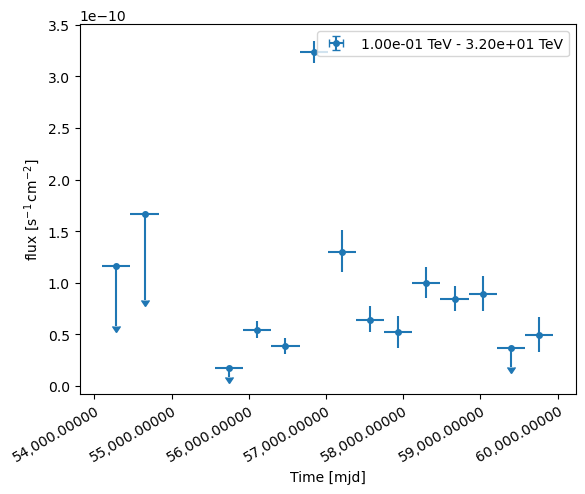

In [56]:
my_lc_yearly.plot(sed_type="flux",time_format="mjd")
# my_lc_yearly.plot_ts_profiles()
plt.yscale('linear')

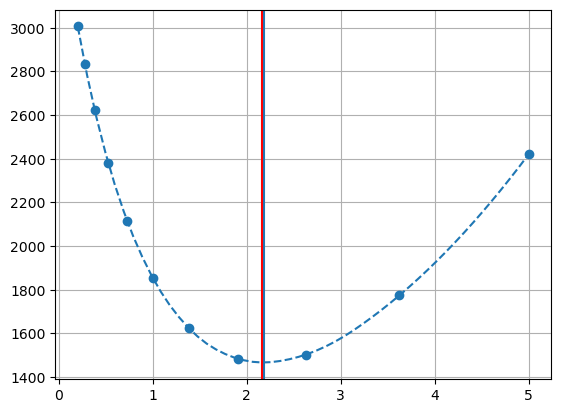

In [61]:
from scipy.interpolate import interp1d
indx = 5

plt.plot(tab_lc[indx]["norm_scan"][0], tab_lc[indx]["stat_scan"][0], "C0o")
inter = interp1d(tab_lc[indx]["norm_scan"][0], tab_lc[indx]["stat_scan"][0], kind = "quadratic")
norm_range = np.linspace(0.201,4.999)
plt.plot(norm_range,inter(norm_range), "C0--")
amin = np.argmin(inter(norm_range))

plt.axvline(tab_lc[indx]['norm'])
plt.axvline(norm_range[amin], color = "r")
plt.grid()

In [219]:
from astropy.table import Table
from typing import Tuple

def get_variability_index(tab : Table) -> Tuple[float, int]:
    """Compute the variability index of a set of light curves.
    
    Parameters:
    -----------
    tab_lc: astropy Table of light curve measurements includeing likelihood profiles
    
    
    Returns:
    --------
    ts_var: float Variability index
    ndf: int Number of degrees of freedom
            
    """

    local_max = []
    norm_range = np.linspace(0.201,4.999, 1000)
    total_prof = np.zeros(len(norm_range))
    for i in range(len(tab)):
        inter = interp1d(tab[i]["norm_scan"][0], tab[i]["stat_scan"][0], kind = "quadratic")
        
        # Get the maximum of the interpolated profile
        local_max.append(np.min(inter(norm_range)))
        # Record the total
        total_prof += inter(norm_range)


    # Likelihood of the global maximum (minimum -2 logl)
    global_max = np.min(total_prof)
    # Get the likelihood of the free maximum (minimum -2 logl)
    free_max = np.sum(local_max)
    # Variability index
    ts_var = global_max - free_max
    # ndf = n_points - 1
    return ts_var, len(tab) -1



def get_variability_probability(ts_var: float, ndf: int) -> float:
    """Compute the probability of the variability index.
    
    Parameters:
    -----------
    ts_var: float Variability index
    ndf: int Number of degrees of freedom
            
    Returns:
    --------
    prob: float Probability of the variability index
            
    """
    prob = chi2.sf(ts_var, ndf)
    return prob


def get_change_points(tab, threshold = 0.005):

    n_obs = len(tab)
    print (n_obs)
    last_change_point = 0
    change_points = [0]

    while last_change_point < n_obs:
        change_point = None
        for i in range(last_change_point, n_obs):
            print (i)
            ts_var, ndf = get_variability_index(tab[last_change_point:i+1])
            prob = get_variability_probability(ts_var, ndf)
            print (prob, ts_var, ndf)
            if prob < threshold:
                print (f"Change point at {i}")
                change_points.append(i)
                last_change_point = i
                break
            
        if change_point is None:
            # print ("No change point found")
            break
        # last_change_point = n_obs
        # break
    return change_points

In [220]:
get_change_points(tab_lc)

14
0
nan 0.0 0
1
0.468937879911425 0.5244776236178552 1
2
0.6836505577284854 0.7606167448348202 2
3
0.07888222934614407 6.7905409360649855 3
4
0.13793164543772263 6.961596502088128 4
5
2.5459092416620588e-133 627.3037012330251 5
Change point at 5
5
nan 0.0 0
6
1.0132441101386853e-12 50.81830334445749 1
Change point at 6
6
nan 0.0 0
7
0.004268084959651283 8.166088578822325 1
Change point at 7
7
nan 0.0 0
8
0.5600557371989198 0.339607726432007 1
9
0.06088229322023867 5.597625796525961 2
10
0.10105215149977131 6.227484647432902 3
11
0.15377214612517603 6.680409804701526 4
12
7.082089797895422e-05 26.517016886484726 5
Change point at 12
12
nan 0.0 0
13
0.2202957006544479 1.5024439646581982 1
12
nan 0.0 0
13
0.2202957006544479 1.5024439646581982 1
12
nan 0.0 0
13
0.2202957006544479 1.5024439646581982 1
12
nan 0.0 0
13
0.2202957006544479 1.5024439646581982 1
12
nan 0.0 0
13
0.2202957006544479 1.5024439646581982 1
12
nan 0.0 0
13
0.2202957006544479 1.5024439646581982 1
12
nan 0.0 0
13
0.22029

KeyboardInterrupt: 

750.1315691613173 736.8671150380948
13.26445412322255 5 0.021022649402365444


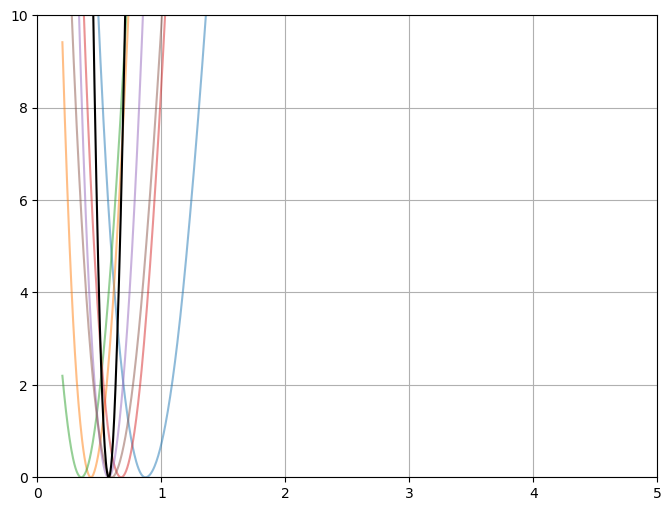

In [188]:
from scipy.stats import chi2
ts_var, ndf, fig = get_variability_index(tab_lc[6:-2])
ax = fig.gca()
ax.grid()
ax.set_ylim(0, 10)
ax.set_xlim(0, 5)
print (ts_var, ndf, chi2.sf(ts_var, ndf))

In [185]:
from astropy.stats import bayesian_blocks
help(bayesian_blocks)

Help on function bayesian_blocks in module astropy.stats.bayesian_blocks:

bayesian_blocks(t, x=None, sigma=None, fitness='events', **kwargs)
    Compute optimal segmentation of data with Scargle's Bayesian Blocks.
    
    This is a flexible implementation of the Bayesian Blocks algorithm
    described in Scargle 2013 [1]_.
    
    Parameters
    ----------
    t : array-like
        data times (one dimensional, length N)
    x : array-like, optional
        data values
    sigma : array-like or float, optional
        data errors
    fitness : str or object
        the fitness function to use for the model.
        If a string, the following options are supported:
    
        - 'events' : binned or unbinned event data.  Arguments are ``gamma``,
          which gives the slope of the prior on the number of bins, or
          ``ncp_prior``, which is :math:`-\ln({\tt gamma})`.
        - 'regular_events' : non-overlapping events measured at multiples of a
          fundamental tick rat

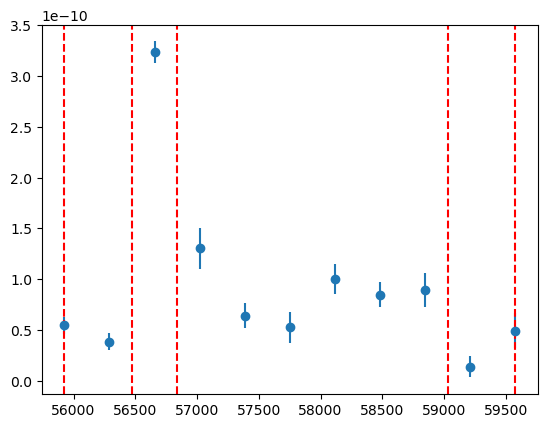

In [177]:
mjd = tab_lc["time_min"]
flux = (tab_lc["ref_flux"] * tab_lc["norm"]).value[:,0]
flux_err = (tab_lc["ref_flux"] * tab_lc["norm_err"]).value[:,0]

mjd = mjd [3:]
flux = flux[3:]
flux_err = flux_err[3:]

plt.errorbar(mjd, flux, yerr=flux_err, fmt="o")


blocks = bayesian_blocks(mjd, flux, sigma = flux_err, fitness="measures")
[plt.axvline(b, color="r", linestyle="--") for b in blocks];
# [plt.axvline(, color="r", linestyle="--") for b in blocks];


In [84]:
tab_lc

time_min,time_max,e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,238]","float64[1,238]",float64[1],float64[1],bool[1],"float64[1,238]",bool[1],"float64[1,11]","float64[1,11]"
54101.000754444445,54466.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.0006095341775339365,0.01937823570945832,nan,0.37841993377151567,0.7821426529616142,-0.0003057047355916609,0.0,nan .. nan,nan .. nan,12.518422441424143,12.518116736688551,True,nan .. nan,True,12.862184234093291 .. 73.07917463082359,0.2 .. 4.999999999999999
54466.000754444445,54831.000754444445,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.4224655212292756,0.2955505063966719,nan,0.32739560022742,1.1232454449651637,3.9021989315232553,1.9753984234891084,nan .. nan,nan .. nan,18.843608874915546,22.7458078064388,True,nan .. nan,True,19.610471728225527 .. 85.0334764132297,0.2 .. 4.999999999999999
55561.000766018515,55926.000766018515,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,nan,nan,0.03350133832397354,0.033501338323973444,0.11658536024255445,-0.00017573064721432274,-0.0,nan .. nan,nan .. nan,76.59910782163638,76.59893209098917,True,nan .. nan,False,84.22947398913192 .. 546.0319139732877,0.2 .. 4.999999999999999
55926.000766018515,56291.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.3670254639458603,0.05800116925989378,0.056519535355394494,0.059188991305557305,0.4880729047486191,60.05816551761387,7.749720350929695,nan .. nan,nan .. nan,218.01879882538543,278.0769643429993,False,nan .. nan,True,227.82022348726767 .. 1733.7907809770952,0.2 .. 4.999999999999999
56291.00077759259,56656.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.2589376952605952,0.05406833530817947,0.05254966377146948,0.05506901281911669,0.3716866755273507,32.575398369015176,5.7074861689727445,nan .. nan,nan .. nan,207.716625779929,240.29202414894417,False,nan .. nan,True,208.9854805077398 .. 1786.454728971314,0.2 .. 4.999999999999999
56656.00077759259,57021.00077759259,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,2.1825375343497377,0.07125754214632031,0.07065643516231557,0.07187015838331767,2.3276608335067177,2109.3173142516716,45.92730467000727,nan .. nan,nan .. nan,1467.8819930905747,3577.1993073422464,False,nan .. nan,True,3006.174384762662 .. 2420.8328562568345,0.2 .. 4.999999999999999
57021.00077759259,57386.00078916667,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.8786651094846404,0.13779241653161056,0.13292074796190753,0.14169671729669595,1.170800232586132,76.81434112742791,8.764379106783773,nan .. nan,nan .. nan,114.74853569138672,191.56287681881463,False,nan .. nan,True,153.59941687225094 .. 433.65841579046713,0.2 .. 4.999999999999999
57386.00078916667,57751.00078916667,1.789961539647311,0.10000000000000002,32.039623134165716,1.3450333511891988e-13,1.482936992444965e-10,2.4385945910013407e-11,0.43174360619969526,0.0843954108657425,0.08099389977079308,0.08783756890225121,0.6144008284889259,40.003259055882495,6.324812966079115,nan .. nan,nan .. nan,104.78050695906066,144.78376601494315,False,nan .. nan,True,114.26814320080771 .. 735.6177690607948,0.2 .. 4.9999999999